<a href="https://colab.research.google.com/github/Nishantnirala1512/DS290822B-course/blob/main/k_means_edyoda_3rd_jan_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
X = iris['data']
y = iris['target']

In [ ]:
df = pd.DataFrame(X, columns = iris['feature_names'])
df['target'] = y

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
np.unique(y)

array([0, 1, 2])

In [ ]:
# Decide K
# 1. k =  3 based on domain knowledge
# 2. Plot data in 2 D and then identify k value
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(X)

In [ ]:
x_reduced[:3]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943]])

In [ ]:
pd.DataFrame(x_reduced)

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


In [ ]:
col_1 = x_reduced[:, 0]
col_2 = x_reduced[:, 1]

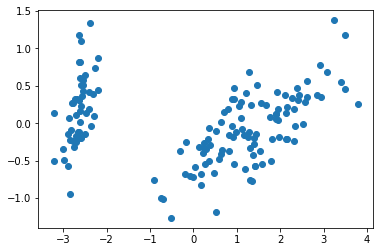

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(col_1, col_2)

In [ ]:
# Import KMeans Algorithm
from sklearn.cluster import KMeans
# Initialize the object
model = KMeans(n_clusters = 2)
# Fit the model
model.fit(X)

KMeans(n_clusters=2)

In [ ]:
# Get the Cluster labels
cluster_labels = model.labels_

In [ ]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

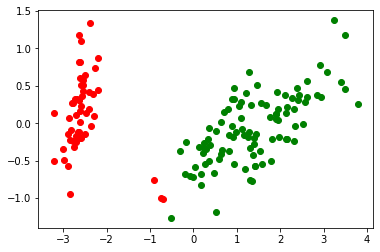

In [ ]:
plt.scatter(col_1[np.argwhere(cluster_labels==1)], col_2[np.argwhere(cluster_labels==1)], color = 'red')
plt.scatter(col_1[np.argwhere(cluster_labels==0)], col_2[np.argwhere(cluster_labels==0)], color = 'green')

In [ ]:
# Elbow method to get K value
error = []
for k in range(1, 11):
  model = KMeans(n_clusters = k)
  model.fit(X)
  error.append(model.inertia_)

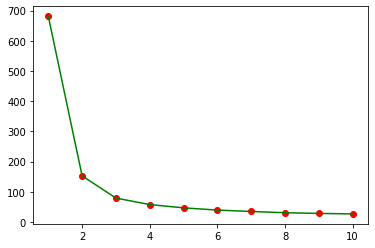

In [ ]:
plt.scatter(range(1, 11), error, color = 'red')
plt.plot(range(1, 11), error, color = 'green')

In [ ]:
model = KMeans(n_clusters = 3)
model.fit(X)
cluster_labels = model.labels_
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

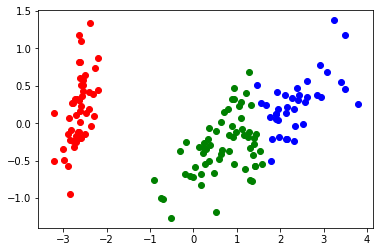

In [ ]:
plt.scatter(col_1[np.argwhere(cluster_labels==1)], col_2[np.argwhere(cluster_labels==1)], color = 'red')
plt.scatter(col_1[np.argwhere(cluster_labels==0)], col_2[np.argwhere(cluster_labels==0)], color = 'green')
plt.scatter(col_1[np.argwhere(cluster_labels==2)], col_2[np.argwhere(cluster_labels==2)], color = 'blue')